In [11]:
import pandas as pd
file_path = "./대전교통공사_시간대별승하차인원_20250131.csv"
df = pd.read_csv(file_path, encoding="EUC-KR")
df.head() # 맨앞 데이터 5개 가져오기
# data.tail()

,날짜,역번호,역명,구분,합계,03-04시,04-05시,05-06시,06-07시,07-08시,...,17-18시,18-19시,19-20시,20-21시,21-22시,22-23시,23-00시,00-01시,01-02시,02-03시
0,2025-01-01,1101,판암,승차,1998,0,0,45,38,57,...,145,102,69,63,30,34,15,0,0,0
1,2025-01-01,1101,판암,하차,1853,0,0,22,51,39,...,182,138,103,99,99,84,37,16,0,0
2,2025-01-01,1102,신흥,승차,870,0,0,13,15,24,...,82,54,28,22,13,18,2,0,0,0
3,2025-01-01,1102,신흥,하차,824,0,0,12,28,26,...,79,63,51,71,43,41,29,1,0,0
4,2025-01-01,1103,대동,승차,1601,0,0,32,41,60,...,116,87,65,64,49,37,20,0,0,0


In [12]:
columns0 = ['date','num','name','type','total']
time_col = [f"{i}~{i+1}H" for i in range(1,24)]
columns = columns0 + time_col+ ['24~01H'] 
df.columns = columns
df = df.loc[:,:'total']

In [13]:
df.head()

,date,num,name,type,total
0,2025-01-01,1101,판암,승차,1998
1,2025-01-01,1101,판암,하차,1853
2,2025-01-01,1102,신흥,승차,870
3,2025-01-01,1102,신흥,하차,824
4,2025-01-01,1103,대동,승차,1601


In [14]:
data = df.groupby(['num','name','date']).sum().reset_index()
# data[data['date']=='2025-01-01']
data

,num,name,date,type,total
0,1101,판암,2025-01-01,승차하차,3851
1,1101,판암,2025-01-02,승차하차,7705
2,1101,판암,2025-01-03,승차하차,7918
3,1101,판암,2025-01-04,승차하차,5954
4,1101,판암,2025-01-05,승차하차,4083
...,...,...,...,...,...
677,1122,반석,2025-01-27,승차하차,7976
678,1122,반석,2025-01-28,승차하차,5723
679,1122,반석,2025-01-29,승차하차,4412
680,1122,반석,2025-01-30,승차하차,6042


In [15]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,True])
gdata.head()

,name,date,total
372,갈마,2025-01-01,3290
373,갈마,2025-01-02,5549
374,갈마,2025-01-03,6650
375,갈마,2025-01-04,5080
376,갈마,2025-01-05,3591


In [16]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,갈마,160283
1,갑천,51286
2,구암,158572
3,노은,231358
4,대동,185583
5,대전,623933
6,반석,368628
7,서대전네거리,299125
8,시청,413743
9,신흥,95165


In [17]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
5,대전,623933
14,유성온천,516499
8,시청,413743
17,중앙로,377921
6,반석,368628
11,용문,355268
15,정부청사,348824
7,서대전네거리,299125
19,탄방,238994
3,노은,231358


In [18]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path ="./D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

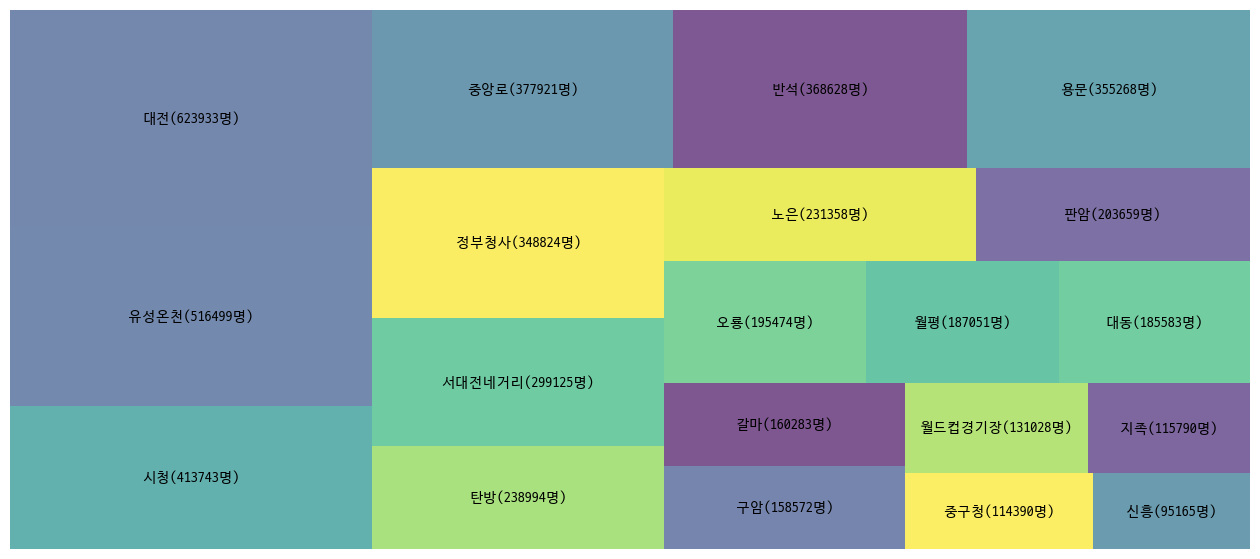

In [19]:
import squarify
plt.figure(figsize=(16,7))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip(total_data['name'],total_data['total'])], alpha= 0.7)
plt.rcParams['font.size'] = 10
# plt.rcParams['text.color']='blue'
plt.gca().invert_yaxis() # 축 뒤집기
plt.axis("off") # 축 인덱스 없애기
plt.show()